In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
#plt.style.use(['nature', 'science', 'no-latex'])
plt.style.use(['seaborn'])
plt.rcParams['font.family'] = 'Times New Roman'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## __TEXT NETWORK__

In [ ]:
# read in data
congress_net = pd.read_csv('/content/drive/MyDrive/Colab_Data/network_data_2/congress.csv', index_col=0)
fp_net = pd.read_csv('/content/drive/MyDrive/Colab_Data/network_data_2/fp.csv', index_col=0)
war_net = pd.read_csv('/content/drive/MyDrive/Colab_Data/network_data_2/war.csv', index_col=0)
inaugural_net = pd.read_csv('/content/drive/MyDrive/Colab_Data/network_data_2/inaugural.csv', index_col=0)
money_net = pd.read_csv('/content/drive/MyDrive/Colab_Data/network_data_2/money.csv', index_col=0)
sotu_net = pd.read_csv('/content/drive/MyDrive/Colab_Data/network_data_2/sotu.csv', index_col=0)
veto_net = pd.read_csv('/content/drive/MyDrive/Colab_Data/network_data_2/veto.csv', index_col=0)
commemoration_net = pd.read_csv('/content/drive/MyDrive/Colab_Data/network_data_2/commemoration.csv', index_col=0)
convention_net = pd.read_csv('/content/drive/MyDrive/Colab_Data/network_data_2/convention.csv', index_col=0)
policy_net = pd.read_csv('/content/drive/MyDrive/Colab_Data/network_data_2/policy.csv', index_col=0)
press_net = pd.read_csv('/content/drive/MyDrive/Colab_Data/network_data_2/press.csv', index_col=0)
university_net = pd.read_csv('/content/drive/MyDrive/Colab_Data/network_data_2/university.csv', index_col=0)

In [ ]:
def adj_to_graph(network, norm='l1'):
    G = nx.from_pandas_adjacency(network, create_using=nx.DiGraph())
    return G

In [ ]:
congress_graph = adj_to_graph(congress_net)

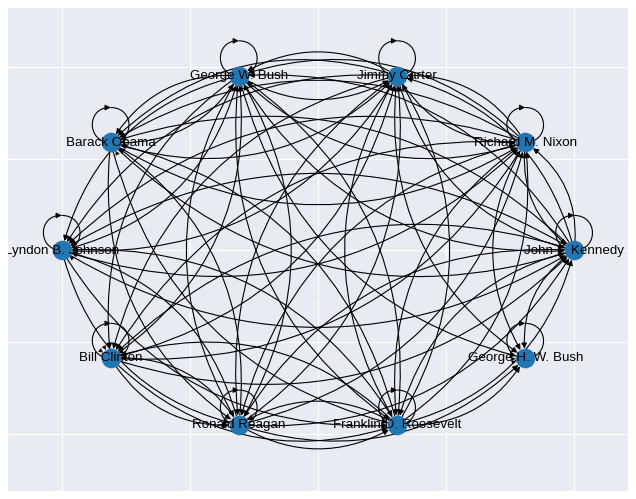

In [ ]:
fig = plt.figure(figsize=(10, 8), dpi=80)
edges = congress_graph.edges()
weights = [congress_graph[u][v]['weight'] for u,v in edges]
pos = nx.circular_layout(congress_graph)
nx.draw_networkx_nodes(congress_graph, pos)
nx.draw_networkx_labels(congress_graph, pos)
nx.draw_networkx_edges(
    congress_graph, pos,
    connectionstyle="arc3,rad=0.3",
    width=weights
)
plt.show()

In [ ]:
df = pd.DataFrame(index=congress_net.columns)
# write in text embedding features
network_names = ['congress', 'fp', 'war', 'inaugural', 'money', 'sotu', 'veto',
                 'commemoration', 'convention', 'policy', 'press', 'university']
for i, network in enumerate([congress_net, fp_net, war_net, inaugural_net, money_net, sotu_net,
                             veto_net, commemoration_net, convention_net, policy_net, press_net, university_net]):
    graph = adj_to_graph(network)
    a = nx.closeness_centrality(graph, distance='weight')
    df[network_names[i]+'_close_centra'] = a.values()
    b = nx.average_neighbor_degree(graph, source="in", target="in", weight='weight')
    df[network_names[i]+'_avg_neig_indeg'] = b.values()
    c = nx.average_neighbor_degree(graph, source="out", target="out", weight='weight')
    df[network_names[i]+'_avg_neig_outdeg'] = c.values()
    d = greedy_modularity_communities(graph, weight='weight')
    for j, cluster in enumerate(d):
        df[network_names[i]+'_cluster_' + str(j)] = 0
        for name in list(cluster):
            df.loc[name, network_names[i]+'_cluster_' + str(j)] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab_Data/rank_bert_1.csv')

## __AUDIO NETWORK__